# 4. Script for statistical analysis of sentiment analysis results

## Set Up

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
path = "C:\\Users\\nicol\\Documents\\2021-2022\\QMSS\\Spring'22\\QMSS 5999 Thesis\\data\\"

# Import score data
reddit = pd.read_csv(path+'comments_reddit_all_score.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'}, keep_default_na=False)
fb = pd.read_csv(path+'comments_fb_all_score.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'}, keep_default_na=False)

In [4]:
display(reddit.head())
display(fb.head())

,comment_id,text,text_clean_sa,text_replaced,score_vader,score_tb
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NO,-0.2960,0.0000
1,gww5jfz,&gt; This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31.\n\nImportant to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,-0.2462,0.2083
2,gww68ne,phase 2 lai liao wah shag,phase 2 lai liao wah shag,phase 2 lai liao wah tired,-0.4404,-0.4000
3,gww6icr,"Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. \n\nEveryone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. \n\nFuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit",-0.9668,-0.2444
4,gww6luf,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,0.0772,-0.1000


,comment_id,text,text_clean_sa,text_replaced,score_vader,score_tb
0,10157877630867115,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.,0.0000,0.0000
1,10157877561317115,"Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens.","Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens.","Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens.",-0.7044,0.0479
2,10157877564117115,Haiz.. no apologies for importing cases. All your doing leh garmen. I'm going to have a friendly chat with my MP!,Haiz.. no apologies for importing cases. All your doing leh garmen. I'm going to have a friendly chat with my MP!,Sigh.. no apologies for importing cases. All your doing leh government. I'm going to have a friendly chat with my Minister of Parliament!,0.3382,0.4688
3,10157877557412115,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!,-0.8805,-0.1250
4,10157877555032115,Blaming us for not following safe distancing measures again instead of blaming themselves.,Blaming us for not following safe distancing measures again instead of blaming themselves.,Blaming us for not following safe distancing measures again instead of blaming themselves.,-0.8319,0.2500


## Obtain datetime data for comments

In [5]:
# Import score data
path = "C:\\Users\\nicol\\Documents\\2021-2022\\QMSS\\Spring'22\\QMSS 5999 Thesis\\data\\"

reddit_score = pd.read_csv(path+'comments_reddit_all_score.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'}, keep_default_na=False)
fb_score = pd.read_csv(path+'comments_fb_all_score.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'}, keep_default_na=False)

reddit_score = reddit_score[['comment_id', 'text_replaced', 'score_vader', 'score_tb']]
fb_score = fb_score[['comment_id', 'text_replaced', 'score_vader', 'score_tb']]

In [6]:
# Inspect score data
display(reddit_score.head())
display(fb_score.head())

,comment_id,text_replaced,score_vader,score_tb
0,gww5drd,ALL MY PLANS ARE GONE NO,-0.2960,0.0000
1,gww5jfz,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,-0.2462,0.2083
2,gww68ne,phase 2 lai liao wah tired,-0.4404,-0.4000
3,gww6icr,"Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit",-0.9668,-0.2444
4,gww6luf,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,0.0772,-0.1000


,comment_id,text_replaced,score_vader,score_tb
0,10157877630867115,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.,0.0000,0.0000
1,10157877561317115,"Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens.",-0.7044,0.0479
2,10157877564117115,Sigh.. no apologies for importing cases. All your doing leh government. I'm going to have a friendly chat with my Minister of Parliament!,0.3382,0.4688
3,10157877557412115,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!,-0.8805,-0.1250
4,10157877555032115,Blaming us for not following safe distancing measures again instead of blaming themselves.,-0.8319,0.2500


In [7]:
# Import Reddit post data
reddit_comment_ids = pd.read_csv(path+'comments_reddit_ids.csv', index_col=0, dtype={'post_id': 'str', 'comment_id': 'str'})
reddit_post_data = pd.read_csv(path+'posts_reddit_fb_selected.csv', dtype={'id':'str'})
reddit_post_data = reddit_post_data[['id', 'created_sgt']]

display(reddit_comment_ids.head())
display(reddit_post_data.head())

,post_id,comment_id
0,n4li0v,gww5drd
1,n4li0v,gww5jfz
2,n4li0v,gww68ne
3,n4li0v,gww6icr
4,n4li0v,gww6luf


,id,created_sgt
0,n4li0v,4/5/2021 18:59
1,n4li5g,4/5/2021 18:59
2,n52529,4/5/2021 19:00
3,n61hcv,6/5/2021 15:09
4,nc0vau,14/5/2021 13:06


In [8]:
# Join Reddit post data to score data to obtain score data with datetime info
reddit_comment_data = reddit_comment_ids.merge(reddit_score, how='inner', on='comment_id')
reddit_comment_data = reddit_comment_data.merge(reddit_post_data, how='inner', left_on='post_id', right_on='id').drop(['post_id', 'id'], axis=1)
reddit_comment_data.head()

,comment_id,text_replaced,score_vader,score_tb,created_sgt
0,gww5drd,ALL MY PLANS ARE GONE NO,-0.2960,0.0000,4/5/2021 18:59
1,gww5jfz,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,-0.2462,0.2083,4/5/2021 18:59
2,gww68ne,phase 2 lai liao wah tired,-0.4404,-0.4000,4/5/2021 18:59
3,gww6icr,"Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit",-0.9668,-0.2444,4/5/2021 18:59
4,gww6luf,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,0.0772,-0.1000,4/5/2021 18:59


In [9]:
# Define function to extract date from created_sgt column and apply it to the dataframe
def get_date(date_str):
    import datetime
    date = datetime.datetime.strptime(date_str, "%d/%m/%Y %H:%M").date()
    return(date)

reddit_comment_data['date'] = reddit_comment_data.created_sgt.apply(get_date)
reddit_comment_data['date'] = reddit_comment_data.date.astype(str)
reddit_comment_data = reddit_comment_data.drop('created_sgt', axis=1)
reddit_comment_data.head()

,comment_id,text_replaced,score_vader,score_tb,date
0,gww5drd,ALL MY PLANS ARE GONE NO,-0.2960,0.0000,2021-05-04
1,gww5jfz,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,-0.2462,0.2083,2021-05-04
2,gww68ne,phase 2 lai liao wah tired,-0.4404,-0.4000,2021-05-04
3,gww6icr,"Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit",-0.9668,-0.2444,2021-05-04
4,gww6luf,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,0.0772,-0.1000,2021-05-04


In [10]:
# Import Facebook comment data
fb_comment_data = pd.read_csv(path+'comments_fb_all.csv', index_col=0, dtype={'comment_id': 'str', 'text_id': 'str'})
fb_comment_data = fb_comment_data[['comment_id', 'post_time']]
fb_comment_data.head()

,comment_id,post_time
0,10157877630867115,2021-05-04 06:59:47
1,10157877561317115,2021-05-04 06:59:47
2,10157877564117115,2021-05-04 06:59:47
3,10157877557412115,2021-05-04 06:59:47
4,10157877555032115,2021-05-04 06:59:47


In [11]:
# Join Facebook comment data to score data to obtain score data with datetime info
fb_comment_data = fb_score.merge(fb_comment_data, how='inner', on='comment_id')
fb_comment_data.head()

,comment_id,text_replaced,score_vader,score_tb,post_time
0,10157877630867115,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.,0.0000,0.0000,2021-05-04 06:59:47
1,10157877561317115,"Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens.",-0.7044,0.0479,2021-05-04 06:59:47
2,10157877564117115,Sigh.. no apologies for importing cases. All your doing leh government. I'm going to have a friendly chat with my Minister of Parliament!,0.3382,0.4688,2021-05-04 06:59:47
3,10157877557412115,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!,-0.8805,-0.1250,2021-05-04 06:59:47
4,10157877555032115,Blaming us for not following safe distancing measures again instead of blaming themselves.,-0.8319,0.2500,2021-05-04 06:59:47


In [12]:
# Define function to extract date from post_time column and apply it to the dataframe
def get_date(date_str):
    import datetime
    date = datetime.datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S").date()
    return(date)

fb_comment_data['date'] = fb_comment_data.post_time.apply(get_date)
fb_comment_data['date'] = fb_comment_data.date.astype(str)
fb_comment_data = fb_comment_data.drop('post_time', axis=1)
fb_comment_data.head()

,comment_id,text_replaced,score_vader,score_tb,date
0,10157877630867115,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.,0.0000,0.0000,2021-05-04
1,10157877561317115,"Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens.",-0.7044,0.0479,2021-05-04
2,10157877564117115,Sigh.. no apologies for importing cases. All your doing leh government. I'm going to have a friendly chat with my Minister of Parliament!,0.3382,0.4688,2021-05-04
3,10157877557412115,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!,-0.8805,-0.1250,2021-05-04
4,10157877555032115,Blaming us for not following safe distancing measures again instead of blaming themselves.,-0.8319,0.2500,2021-05-04


## Plot changes in score over time

In [13]:
# Concatenating dataframes into one dataframe with an additional column indicating platform
reddit_comment_data['platform'] = 'Reddit'
fb_comment_data['platform'] = 'Facebook'

all_comment_data = pd.concat([reddit_comment_data, fb_comment_data], ignore_index=True)

In [14]:
all_comment_data.head()

,comment_id,text_replaced,score_vader,score_tb,date,platform
0,gww5drd,ALL MY PLANS ARE GONE NO,-0.2960,0.0000,2021-05-04,Reddit
1,gww5jfz,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,-0.2462,0.2083,2021-05-04,Reddit
2,gww68ne,phase 2 lai liao wah tired,-0.4404,-0.4000,2021-05-04,Reddit
3,gww6icr,"Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit",-0.9668,-0.2444,2021-05-04,Reddit
4,gww6luf,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,0.0772,-0.1000,2021-05-04,Reddit


In [15]:
# Creating dataframes for each model
vader = all_comment_data[['date', 'platform', 'score_vader']]
tb = all_comment_data[['date', 'platform', 'score_tb']]

In [16]:
# Get mean scores grouped by date
vader_plot = vader.groupby(['date', 'platform']).mean().reset_index()
tb_plot = tb.groupby(['date', 'platform']).mean().reset_index()

In [17]:
vader_plot

,date,platform,score_vader
0,2021-05-04,Facebook,0.060588
1,2021-05-04,Reddit,0.040460
2,2021-05-06,Facebook,-0.031260
3,2021-05-06,Reddit,0.082525
4,2021-05-14,Facebook,0.036062
5,2021-05-14,Reddit,0.043576
6,2021-05-15,Facebook,0.060487
7,2021-05-15,Reddit,0.075349
8,2021-05-16,Facebook,0.135337
9,2021-05-16,Reddit,0.186168


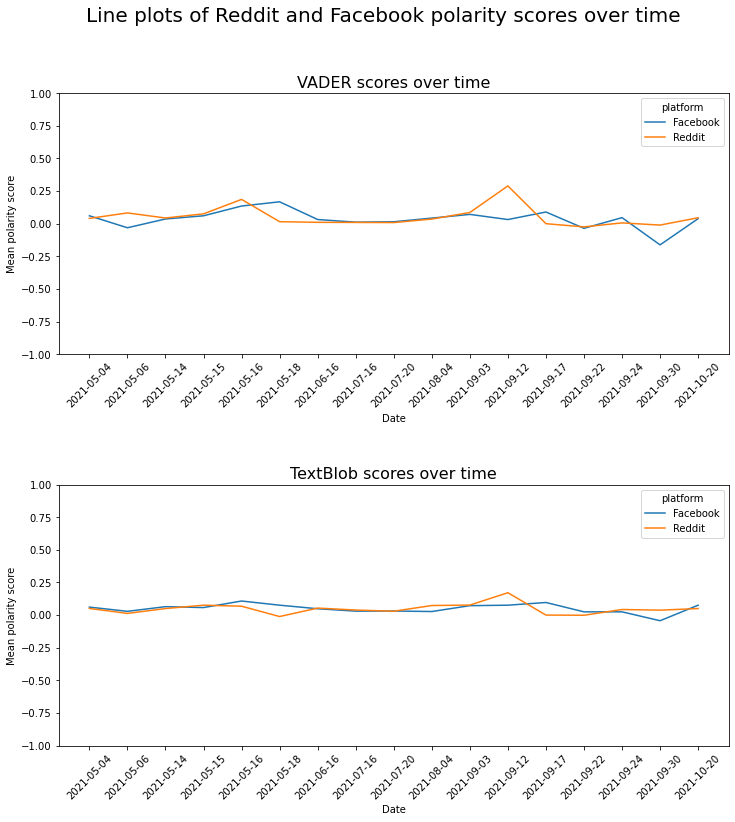

In [18]:
# Plot scores over time
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize = (12, 12))
fig.suptitle('Line plots of Reddit and Facebook polarity scores over time', fontsize=20)
plt.subplots_adjust(hspace=0.5)

sns.lineplot(x='date', y='score_vader', hue='platform', 
             data=vader_plot, ax=axes[0]).set(xlabel='Date', ylabel='Mean polarity score', ylim=[-1,1])
axes[0].set_title('VADER scores over time',fontsize=16)
axes[0].tick_params('x', labelrotation=45) 

sns.lineplot(x='date', y='score_tb', hue='platform', 
             data=tb_plot, ax=axes[1]).set(xlabel='Date', ylabel='Mean polarity score', ylim=[-1,1])
axes[1].set_title('TextBlob scores over time',fontsize=16)
axes[1].tick_params('x', labelrotation=45) 

plt.savefig('../plots/timeplots.png', bbox_inches='tight')
plt.show()

Plotting the change in sentiment scores over time gives better insight into why there is no statistically significant difference between the mean polarity score of Facebook and Reddit comments. For both VADER and TextBlob scoring, we see that while Reddit comments are more negative than Facebook comments initially sometime in May-June 2021, Reddit comments are substantially more positive than Facebook comments in Sep-Oct 2021. To understand these patterns, I will look closer at the articles and the corresponding comments at 3 points when the gap in scores across platform was biggest: 18 May 2021, 12 Sep 2021 and 30 Sep 2021

## Closer inspection of comments from certain dates

### Comments from 2021-05-18

In [19]:
# Inspect Reddit comments from 2021-05-18
reddit_comment_data[reddit_comment_data['date'] == '2021-05-18']

,comment_id,text_replaced,score_vader,score_tb,date,platform
2877,gyk0jfj,Zoom for rest of year,0.0000,0.0000,2021-05-18,Reddit
2878,gyk1mbz,boomers teach zoomers over zoom,0.0000,0.0000,2021-05-18,Reddit
2879,gyk3eun,Can control like that mah?,0.3612,0.0000,2021-05-18,Reddit
2880,gyk4xz9,"Aged 18 and below is like all students, poly and university kids don't take tuition",0.3612,-0.1000,2021-05-18,Reddit
2881,gyk87h0,I know University folks that took tuition. Very good money.,0.4927,0.9100,2021-05-18,Reddit
2882,gyka1pl,Huh. How is this under Ministry of Education? Ministry of Education controls private tutoring?,0.0000,0.0000,2021-05-18,Reddit
2883,gykaae1,If you get covid and contact traced due to this you oh no lo.,-0.2960,-0.1250,2021-05-18,Reddit
2884,gykaidf,What does that even mean? Lol,0.4215,0.2438,2021-05-18,Reddit
2885,gykajxl,Did you mean to post this elsewhere? I am asking how any of this falls into MOEs purview. You didn't address it at all.,0.0000,-0.3125,2021-05-18,Reddit
2886,gykc647,"I think he’s saying yes it’s difficult for Ministry of Education to control, but once you get caught (someone sabotage you/contact tracing), it’s implied that the Government will not come down lightly on you and you are proceeding at your own risk. Hopefully this is enough deterrence for private tutoring to stop",-0.7506,0.0574,2021-05-18,Reddit


In [20]:
# Inspect Facebook comments from 2021-05-18
fb_comment_data[fb_comment_data['date'] == '2021-05-18']

,comment_id,text_replaced,score_vader,score_tb,date,platform
2789,10158304656502934,"Honestly, preschools should be closed as well. Childcare and studentcare to be open for parents who can’t Work From Home. These young ones are told that they can’t sing songs and play together with others... have you interacted with kids below 6yo? 🤦🏻‍♀️ Most childcare centres are pretty small. When they eat or during routine time, their masks are off and they’d definitely talk to each other. Many preschoolers have older siblings in primary or secondary school. I’m very worried that there’d be an outbreak in preschools coz can you imagine what these kiddos will be going through? Please don’t wait until the bomb go jibaboom le then react. Like what these politicians have been doing. The older kids are suffering because of these politicians man 😢",0.9164,0.1406,2021-05-18,Facebook
2790,10158304806757934,This dribs-and-drabs strategy is so confusing that even SPH Money FM gave the wrong covid-19 restrictions earlier this afternoon. Someone must explain to the higher-ups aka Ministers the meaning of death by a thousand cuts.,-0.8932,-0.2667,2021-05-18,Facebook
2791,10158304706362934,All adults courses that are conducted in groups should be suspended as well. Stay safe,0.2263,0.5000,2021-05-18,Facebook
2792,10158305563272934,Perhaps extra tuition can be phased out permanently as well and people can actually live now.... I think only Singapore puts so much emphasis on tuition...,0.2732,0.0841,2021-05-18,Facebook
2793,10158305311122934,"Please make it mandatory for lifelong learning institutes to convert all classes to online classes too.. Apparently classes are still being conducted physically with multiple learners still coming in and out of the centres to attend their lessons in groups of more than 2 people. Though this round of viruses may be more prone towards children, that does not mean it does not affect the adults too. We should minimise all these risks now to prevent further clusters from happening. Singapore Ministry of Manpower Ministry of Health, Singapore",0.1531,0.1007,2021-05-18,Facebook
2794,10158304653407934,Remember some time back we wanted to find ways to not have parents not push kids to tuition and lessen pressures on our kids. Turns out the solution was a pandemic.,0.0000,0.0000,2021-05-18,Facebook
2795,10158304646142934,"If feasible, turn off all airconditioning and open windows of rooms to minimise chances of transmission.",0.2023,0.0000,2021-05-18,Facebook
2796,10158304917352934,Don’t complain. 61% voted for People's Action Party. So this is the consequences.,0.0516,0.1000,2021-05-18,Facebook
2797,10158304811027934,Just wondering whether there will be lesser topics tested for major exams.,0.0000,0.0312,2021-05-18,Facebook
2798,10158306385772934,I would say piano one on ones especially for the super young kids should still remain open physically especially this age group like 4 to 7 is too young to do zooming.,0.7693,0.0889,2021-05-18,Facebook


**May 18 article (FB more positive than Reddit)**: 'All in-person private tuition and enrichment for students aged 18 and below to be suspended: MOE'
- Some Reddit comments lamented the negative impact on children's education without the additional academic support and on tutor's incomes
- Several Facebook comments supported the move for protecting students and called on the government to extend this measure to other settings like adult classes
- But a lot of them are misclassified because of mixed sentiment in the comment, and undetected sarcasm and sarcastic use of laughing emojis (which are indeed hard to classify because such emojis take on different polarities in different contexts)

In [21]:
# Inspect Reddit comments from 2021-09-12
reddit_comment_data[reddit_comment_data['date'] == '2021-09-12']

,comment_id,text_replaced,score_vader,score_tb,date,platform
6606,hcjh1d8,"> This temporary suspension of visitation will give us time to encourage more unvaccinated seniors to get vaccinated, and roll out the vaccine booster programme for residents of aged care facilities,” All there we go",0.7579,0.2000,2021-09-12,Reddit
6607,hcjhrsy,"As someone who works in a nursing home, I just feel so done with all these on-off-on-off restrictions. Sigh and again with the buying time for unvaccinated seniors to get vaccinated.... I have no words",-0.2732,0.0000,2021-09-12,Reddit
6608,hcjim3f,Would a vaccine mandate help? What would you wish the government did as someone deep in the weeds?,0.6966,0.0000,2021-09-12,Reddit
6609,hcjjuzj,My nursing home has already achieved 90% vaccinated status.. the remaining 10% are mostly anti-vaccinated Not sure how much a vaccine mandate might help since these anti-vaccinated would rage about whether the government will take responsibility if they get side effects from the vaccine We've been encouraging them to get vaccinated for like a year... Feel more like a pushy salesman than a healthcare worker at this point,0.5373,0.2375,2021-09-12,Reddit
6610,hcjk694,Hmm… what about segregation?,0.0000,0.0000,2021-09-12,Reddit
6611,hcjklod,Again uselessly pursuing the vaccination rates. Those that can and want to get vaccinated have already done their first shot by now,-0.2960,-0.1250,2021-09-12,Reddit
6612,hcjlgku,Imagine being a vaccinated resident and now you can't get visitors anymore,0.0000,0.0000,2021-09-12,Reddit
6613,hcjpk4f,Do you think it would be feasible to allow visits if both resident and visitor are fully vaccinated? Blanket restrictions that apply as harshly to both vaccinated and unvaccinated are making less and less sense given the direction we have chosen to tackle the pandemic.,0.2263,-0.1778,2021-09-12,Reddit
6614,hcjrs9m,"Really no reason to “buy them more time”. They’re not interested. Period. If they don’t want to get vaccinated then they should pay the price. ""We're aiming for free movement... What will happen now is that the virus will circulate and it will find the ones who are not vaccinated,"" epidemiologist Lone Simonsen told AFP",0.0678,0.1688,2021-09-12,Reddit
6615,hcjtstg,"The SJWs are gonna get triggered and start pulling up comparisons with apartheid, US racial segregation, even the Holocaust",0.0000,0.0000,2021-09-12,Reddit


In [25]:
# Inspect Facebook comments from 2021-09-12
display(fb_comment_data[fb_comment_data['date'] == '2021-09-12'].head(25))
display(fb_comment_data[fb_comment_data['date'] == '2021-09-12'].tail(25))

,comment_id,text_replaced,score_vader,score_tb,date,platform
5114,10158522948382934,"My heart goes out to dementia patients in homes. They may not understand the need to get vaccinated, and it may be difficult to explain to them, given the nature of dementia. For some, when they see a needle, they may also think that they are being harmed and may react -\-\ which could be violent -\-\ not all dementia patients of course, but it is tough for them and their caregivers bcoz they cannot understand what is going on.... 😢😔",-0.7964,-0.5630,2021-09-12,Facebook
5115,10158522931417934,If the goal is to protect them clearly not opening up as quickly would have been wise.,0.8126,0.3278,2021-09-12,Facebook
5116,10158523094692934,"Most, if not all, in old aged homes are vaccinated. The authorities said that if vaccinated, symptoms will be mild. So we hope they are not doing an ""emperor's new clothes"" again.",0.4902,0.1939,2021-09-12,Facebook
5117,10158523285022934,"Please please speed up Vaccination Please make 60 year and above compulsory vaccination unless their doctors certified can not be vaccinated, and those can not walk 60 years old and above vaccinate at their home please.",0.8020,0.0333,2021-09-12,Facebook
5118,10158522976762934,Is this the reason why you dont announce unlinked cases anymore? We as families deserves to know which facilities are affected so wheres the transparency?,-0.2406,0.0000,2021-09-12,Facebook
5119,10158525230577934,"No visitors , good temporary restriction. Be safe then sorry.",0.2960,0.2333,2021-09-12,Facebook
5120,10158522934492934,The government wan us to accept as endemic yet stop this and that. Really nonsense lah....,-0.3804,0.0000,2021-09-12,Facebook
5121,10158522869322934,"Covid variant has invaded many places. Yet, many continue to flock to crowded places.",0.0000,0.5000,2021-09-12,Facebook
5122,10158522927177934,Want to open borders yet want to have so many restrictions it make no sense… open borders invite new covid viruses 🦠,0.0000,0.1591,2021-09-12,Facebook
5123,10158522933207934,"This is a hard decision for family members to take. For an elderly and immunocompromis ed 70 and above person, the question is whether it is worth it to get a vaccination or let nature takes its course. Unless that person is totally isolated, once exposed to an infected caretaker or family member, he or she will be ravished by the virus when it passes through. If the vaccines are very very safe for normal elderly persons, then rationally, it is better to get a vaccination. But this responsibility cannot be passed to doctors to do the persuasion. Only immediate family members can come to a common decision as what is best to recommend for those elderly who depend on them for their needs.",0.8836,0.2008,2021-09-12,Facebook


,comment_id,text_replaced,score_vader,score_tb,date,platform
5182,10158522918677934,Hush Hush game,0.0000,-0.4000,2021-09-12,Facebook
5183,10158522908622934,Lee Ryan,0.0000,0.0000,2021-09-12,Facebook
5184,10158522908607934,In order to get to be in the world for the most vaccinated People's Action Party HAS RESORT TO FEAR THREATENING DIVIDING SINGAPOREANS LYING BRIBIng,-0.8885,0.3000,2021-09-12,Facebook
5185,10158522903947934,Were they all vaccinated? 😳,0.0000,0.0000,2021-09-12,Facebook
5186,10158522899692934,Looks like they are unable to hide these outbreaks anymore.,0.2023,-0.5000,2021-09-12,Facebook
5187,10158522899452934,Kennot visit Uncle Hong,0.0000,0.0000,2021-09-12,Facebook
5188,10158522899012934,is there further details on which 18 nursing homes were having the 42 infected elderly? these data should be very transparent during your reporting.,-0.4939,0.1000,2021-09-12,Facebook
5189,10158522898117934,"It time to declare HA again, don't because you scare to subsidy money & hold on to it😬🥵",0.5205,0.0000,2021-09-12,Facebook
5190,10158522897782934,Some Kongs n MAs bochap because they know they are old n alone n hence doesnt matter if they got it or not.,-0.2672,0.1000,2021-09-12,Facebook
5191,10158522896682934,Top fan Eric Buddy Lee,0.4767,0.5000,2021-09-12,Facebook


**Sep 12 article (Reddit more positive than FB)**: 'MOH suspends in-person visits to residential care homes from Monday as COVID-19 cases rise among residents, employees'
- Redditors were rather supportive overall of hospital care home measures as an exception to the move towards endemic living with COVID, because of the need to protect the vulnerable. Some complex comments containing mixed sentiments but dominant overall negative sentiment were however misclassified as positive.
- Whereas Facebook comments were more negative - some lamented that the measures were detrimental to the elderly and concerned about the negative impact of no visitors on their mental health. Many comments also complained about the government's lack of advance notice given for these restrictions, and lack of transparency in reporting the spread of the virus in elderly homes.

In [27]:
# Inspect Reddit comments from 2021-09-30
display(reddit_comment_data[reddit_comment_data['date'] == '2021-09-30'].head(20))
display(reddit_comment_data[reddit_comment_data['date'] == '2021-09-30'].tail(20))

,comment_id,text_replaced,score_vader,score_tb,date,platform
7871,hetsv0s,I feel reeally bad for students. 2 years online. University is also about socializing and learn to have face to face interactions with academics and fellow students. Stay strong. I really hope you have at least a year of REAL studies...,0.4576,-0.0333,2021-09-30,Reddit
7872,hett649,"Either way we are sacrificing things. With restrictions we may save lives. But that comes at a larger cost in the development of children, which may in turn trigger a mental health epidemic. The current generation lacks social interactions, are isolated. Is that price worth it?",0.1280,0.0467,2021-09-30,Reddit
7873,hett9jb,Endemic by the way,0.0000,0.0000,2021-09-30,Reddit
7874,hettemc,What about those that paid for hall,0.0000,0.0000,2021-09-30,Reddit
7875,hettfsq,😂😂🤡,0.7003,0.0000,2021-09-30,Reddit
7876,hettiot,"The social aspect was one of the few things I still remember from my university days. A shame that undergrads, a group of young adults who are the very least vulnerable of us, won’t be having much. Also, how are they supposed to network? A lot of internships are still available but Work From Home is a terrible way to meet industry professionals and experience working life there.",-0.7776,-0.1696,2021-09-30,Reddit
7877,hettjck,">a larger cost in the development of children The younger you are, the worse the hit. Think 2-5 year-olds in preschool being ""highly encouraged"" to wear a mask the whole day (except during naptime!), or told that other kids are dangerous and they must stay far far apart.",-0.5717,-0.0572,2021-09-30,Reddit
7878,hettmrf,>or told that other kids are dangerous and they must stay far far apart. I hope this happens nowhere. In a closed school with kids over 8 hours masks effect is... very limited.,-0.3384,-0.1196,2021-09-30,Reddit
7879,hettox7,This and the seniors asked to stay home feels real ominous. I won't be surprised if we actually close with some quasi circuit breaker with a new name so that they don't spook people it's a circuit breaker in 1 or 2 weeks time.,-0.4707,0.1091,2021-09-30,Reddit
7880,hettr3b,"We’re in an endemic situation and all of us are vaccinated. Why do we need to have classes online? We pay school fees for a reason, we should not have online classes. It makes no sense at all. Every universities all over the world are having physical classes and yet we’re the only few to have it online",-0.3818,-0.0667,2021-09-30,Reddit


,comment_id,text_replaced,score_vader,score_tb,date,platform
7919,heub882,"What makes you believe that October 24 is going to mean anything? Have they stuck to these “end dates” before? End dates are just random dates chosen to avoid saying to people that “these restrictions are here for the long run, folks”. And why do we just have to accept this? What’s with the servility?",-0.3736,-0.2875,2021-09-30,Reddit
7920,heucer0,80 deaths over 18 months. I wonder how many died from suicide?,-0.8442,0.5000,2021-09-30,Reddit
7921,heuch5g,Laughing stock of the world right now,0.4939,0.2857,2021-09-30,Reddit
7922,heucttk,"$40,000 Super Chat",0.5994,0.3333,2021-09-30,Reddit
7923,heud7gp,*stares in stranded NTU intl students and academic staffs who are forced to take LOA/no pay leave*,-0.5574,-0.1500,2021-09-30,Reddit
7924,heuexus,"Let's just believe that a lockdown hurts their pockets. The Singapore government are known to be very pro-business. Every lockdown and every restrictions is a difficult decision for them to implement. And the how to reopen is determined by how likely the reopen decision will result in another lockdown. So, it is never in their favour to lockdown forever. They might get you to TraceForever, SwabForever, and TestForever, but never LockdownForever. Simply is not in their interest. The rest of the world has moved on, leaving us and few other countries behind. The government will be eager to catch up with the rest of the world. Now they are struggling to decide whether to sacrifice a few lives for Singapore to catch up with them. I'm pretty confident they will eventually decide to sacrifices a few lives, let them die for the betterment of the country and businesses. They have another 2 to 3 years to do damage control for their political reputation. So no worries for them. My inference is based on common sense and my understanding of the government (read more books). I don't have a crystal ball to give you an exact date on when you can return to school. But I have high confidences that you won't have to lock yourself in your room for long.",-0.5511,-0.0068,2021-09-30,Reddit
7925,heuf6i7,I picked local you which is at least 1 year longer just so I can go for semester exchange and this? Wonderful.,0.6570,0.2333,2021-09-30,Reddit
7926,heuj8ad,"Paying for the same school fees (or higher for whatever reason) to have no access to school facilities:- 1. Gym closed 2. Library closed/restricted 3. Discussion rooms with limited people 4. A chance for the school to kick you out of your accommodation/provide no accomodation and now this recent news to have no access to school wifi for NUS students + yale-nus discontinued news, i just wanna say with Ministry of Health's incompetence with this years covid situation, higher ups in our universities that handle covid decision-making also takes the cake for the most wtf-is-this measure making from a student's pov.",-0.8316,0.1184,2021-09-30,Reddit
7927,heuqtnr,"Dam sad, for other local universities at least you hall life to mingle. For SIM there's almost really no face 2 face interactions at all. I've not met anyone in university for the last 1 year except when there were 1-2 group projects. I wish I could connect with more people, but for the greater good this is part of the norm now.",0.7425,0.0750,2021-09-30,Reddit
7928,heuu1j9,$3000 a year for Panopto,0.0000,0.0000,2021-09-30,Reddit


In [24]:
# Inspect Facebook comments from 2021-09-30
fb_comment_data[fb_comment_data['date'] == '2021-09-30']

,comment_id,text_replaced,score_vader,score_tb,date,platform
5957,10158154349842115,How about the non graduating classes? Because they may have seniors at home?,0.0000,0.0000,2021-09-30,Facebook
5958,10158154323852115,Sebastian Wong,0.0000,0.0000,2021-09-30,Facebook
5959,10158154338022115,"AGAIN, for the nth time, and I will continue to do so: Vaccination is not to make you IMMORTAL. Vaccination does not PREVENT infection or death. It’s to REDUCE your potential of infection/ death.",-0.7706,0.0000,2021-09-30,Facebook
5960,10158154412872115,How about secondary schools? We seem to have neglected this group.,-0.5267,-0.3000,2021-09-30,Facebook
5961,10158154350047115,mothership.Singapore/ 2021/09/ seniors-stay-hom e-covid-19/,0.0000,0.0000,2021-09-30,Facebook
5962,10158154324762115,all unis and schools will eventually no longer exist physically within 3 years. they will all collapse and those that want to - will be stopped by their parents and future planned epidemics,-0.7184,0.0000,2021-09-30,Facebook
5963,10158156046902115,"Unis are institutions which, amongst other missions, are tasked to inspire cutting-edge tech and thinking. University administrators ought to, as far as possible, switch to online learning. Why make students fill lecture rooms for lectures which can just as effectively be given virtually?",0.7650,0.1437,2021-09-30,Facebook
5964,10158154331052115,Now too dangerous Must go online liao,-0.4767,-0.6000,2021-09-30,Facebook
5965,10158154370602115,Epic failure because only relying on leaky vaccines. And hence….the number of hospitalised patients of 616 Fully vaccinated already outnumbered the 470 Not Fully vaccinated. So hospitals are swamped with Fully Vaccinated patients who can also land up needing O2 and hospital. Constantly spending time harping and bullying the unvaccinated these few months when they should have spent more time anticipating the explosion of cases And coming up with a game plan.,-0.7845,-0.0521,2021-09-30,Facebook
5966,10158154543297115,Home-Based Learning and Work From Home should be implemented long ago,0.0000,-0.0500,2021-09-30,Facebook


**Sep 30 article (Reddit more positive than Facebook)**: 'S'pore unis move classes online to reduce spread of Covid-19 as cases continue to rise'
- Some Redditors expressed understanding of the need for these measures and were not critical of the measures because they have resigned to accepting it or learnt to cope with it. However, many of these comments were actually misclassified because of VADER's inability to detect sarcasm.
- Many Facebook comments lamented the tightening of restrictions despite rising vaccination rates and also cast doubt on the effectiveness of vaccination in reducing transmission; some complained not enough done (secondary schools needed to move online too but had not at that point)



